## Урок 3

### Описательная статистика. Качественные и количественные характеристики популяции. 

### Графическое представление данных

[Текст ссылки](https://)Рассмотрим описательные статистические характеристики на примере датасета с данными по хоккеистам.

Воспользуемся данными, приведенными в статье 
<a href='https://habr.com/post/301340/'>«Рост хоккеистов: анализируем данные всех чемпионатов мира в текущем веке»</a>.

Импортируем библиотеки и загрузим данные:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])

Удалим дубликаты:

In [4]:
df = df.drop_duplicates(['name', 'birth'])

Данный датасет мог бы считаться **генеральной совокупностью**, если бы он содержал данные обо всех хоккеистах, 

соответствующих определенным характеристикам.

Если мы выберем случайным образом определенное количество примеров (наблюдений), такое множество можно называть выборкой.

**Выборка** — это случайным образом выбранная часть генеральной совокупности.

Одно из основных понятий в теории вероятностей — **математическое ожидание**. Обозначается как $M(X)$ (в статистике принято обозначение $\mu$).

Математическое ожидание — среднее значение случайной величины (распределение вероятностей стационарной случайной величины) при стремлении количества выборок или количества измерений (иногда говорят — количества испытаний) к бесконечности.

Среднее арифметическое одномерной случайной величины конечного числа испытаний обычно называют оценкой математического ожидания. При стремлении числа испытаний стационарного случайного процесса к бесконечности оценка математического ожидания стремится к математическому ожиданию.

# Найдем среднее значение роста хоккеистов из датасета по формуле:

$$M(X) = \frac{1}{n} \sum\limits_{i=1}^{n} x_i$$

где $x$ — рост, $n$ — количество наблюдений.

In [5]:
mean_height = df['height'].sum() / df['height'].count()
mean_height

183.829386763813

Найдем эту же величину с помощью метода **mean**:

In [6]:
df['height'].mean()

183.829386763813

Полученные значения равны (отличается только количество знаков после запятой). Такая оценка математического ожидания называется несмещенной.

Другим важным показателем выборки является **среднее квадратичное отклонение**. Оно показывает, насколько далеко наблюдения могут быть «разбросаны» относительно среднего значения.

Вычислить его можно по формуле:

$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}}$$

Посчитаем среднее квадратичное отклонение роста хоккеистов:

In [7]:
height_std = np.sqrt(((df['height'] - df['height'].mean())**2).sum() / df['height'].count())
height_std

5.46679870562426

Посчитаем еще раз среднее квадратичное отклонение, но уже с помощью метода **std**:

In [8]:
nums = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [25]:
mean = sum(nums) / len(nums)
n = len(nums)
sum_num = 0
for num in nums:
    sum_num += (num - mean)**2
biased_var = sum_num / n
non_biased_var = sum_num / (n-1)
biased_std = biased_var**0.5
non_biased_std = non_biased_var**0.5

In [26]:
print(mean)
print(biased_var)
print(non_biased_var)
print(biased_std)
print(non_biased_std)

65.3
950.11
1000.1157894736842
30.823854398825596
31.624607341019814


In [11]:
nums_df = pd.DataFrame(nums)
nums_df.var(ddof=1)

0    1000.115789
dtype: float64

In [12]:
print(df['height'].std(ddof=0)**2)
print(df['height'].var(ddof=0))

29.88588808781527
29.885888087815268


**Дисперсия** равна среднему квадратичному отклонению, возведенному в квадрат:

$$\sigma^2 = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}$$

Посчитаем дисперсию роста хоккеистов:

In [13]:
height_variance = ((df['height'] - df['height'].mean())**2).sum() / df['height'].count()
height_variance

29.885888087815086

Такая оценка дисперсии является **смещенной**. Следующая формула показывает, как вычисляется **несмещенная оценка дисперсии**:

$$\sigma^2_{несмещ.} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n - 1}$$

Отличие несмещенной оценки дисперсии от смещенной в том, что мы делим сумму квадратов разностей всех величин со средним значением не на $n$, а на $n - 1$.

Рассчитаем несмещенную дисперсию роста хоккеистов:

In [14]:
height_variance2 = ((df['height'] - df['height'].mean())**2).sum() / (df['height'].count() - 1)
height_variance2

29.894963668771

С помощью метода **var** можно посчитать смещенную оценку дисперсии:

In [15]:
df['height'].var(ddof=0)

29.885888087815268

Несмещенная считается аналогично:

In [16]:
df['height'].var(ddof=1)

29.89496366877118

Аргумент **ddof** (Delta Degrees of Freedom) показывает, какую величину нужно отнять от числа наблюдений $n$, которое находится в формуле дисперсии в делителе.

**Мода** — наиболее часто встречающееся в выборке значение. Для дискретных распределений модой считают любое значение $a_i$, вероятность которого $p_i$ больше, чем вероятности соседних значений.

Если в выборке есть два и более значений, встречающихся с одинаковой (максимальной) вероятностью, то есть выборка имеет две и более мод, то ее называют **мультимодальной**.

Модой абсолютно непрерывного распределения называют любую точку локального максимума плотности распределения.

**Медиана** — значение, которое делит выборку на две части так, что значения, которые меньше медианы, составляют половину (50 %) выборки. То есть половина значений выборки больше медианы, половина — не больше.

**Первый квартиль** — значение, которое не превышают 25 % наблюдений в выборке.

**Второй квартиль** — синоним медианы.

**Третий квартиль** — значение, которое не превышают 75 % наблюдений в выборке.

**Квантиль** — похожее понятие, только в качестве точки может выступать любая величина от 0 до 100 %.

Например, 40 % квантиль — значение, которое не превышают 40 % наблюдений.

**Перцентиль** — частный случай квантиля, в качестве меры берутся целые проценты.

Например, 40 % квантиль — то же, что и 40 % перцентиль.

**Дециль** — частный случай квантиля, в качестве меры берутся десятки процентов.

Например, 70 % квантиль — это также и 7-й дециль.

**Интерквартильное расстояние** — отрезок, равный разности 3-й и 1-й квартили.

# Графическое представление данных

Чтобы получить представление о распределении роста хоккеистов, построим гистограмму. По умолчанию данные разбиваются на 10 частей (аргумент **bins**). Высота столбиков соответствует количеству наблюдений в бине:

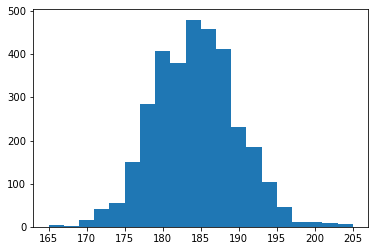

In [17]:
plt.hist(df['height'], bins = 20)
plt.show()

Построим гистограмму еще раз, указав в качестве аргумента **bins** число 20, чтобы получить более детальную картину:

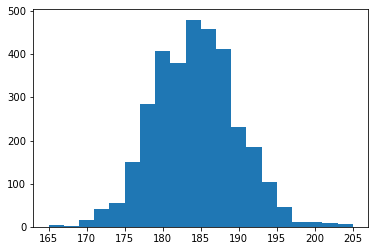

In [18]:
plt.hist(df['height'], bins = 20)
plt.show()

Другой способ графически представить данные — построить диаграмму **boxplot**. Для этого импортируем библиотеку **seaborn**:

In [19]:
import seaborn as sns

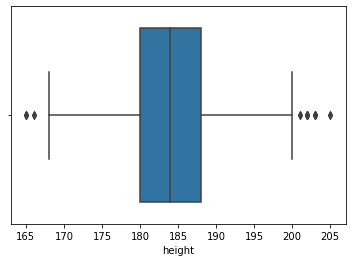

In [20]:
sns.boxplot(df['height'], orient='v')
plt.show()

На данном графике показатели роста располагаются по вертикали. Черта в середине прямоугольника обозначает медиану, его нижняя сторона — 1-й квартиль, а верхняя — 3-й квартиль.

От прямоугольника вверх и вниз отходят «усики». Черта на конце нижнего усика отстоит от 1-го квартиля на 1.5 интерквартильных расстояния, а на конце верхнего — на 1.5 интерквартильных расстояния от 3-го квартиля.

Точки, находящиеся за их пределами, обозначают выбросы в данных — нетипичные наблюдения, которые могут быть и ошибками.

# ДЗ

In [28]:
# №1 Даны значения зарплат из выборки 
# выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. 
# Посчитать (желательно без использования статистических методов наподобие std, var, mean) 
# среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.
nums = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

mean = sum(nums) / len(nums)
n = len(nums)
sum_num = 0
for num in nums:
    sum_num += (num - mean)**2
biased_var = sum_num / n
non_biased_var = sum_num / (n-1)
biased_std = biased_var**0.5
non_biased_std = non_biased_var**0.5

print(f'Среднее арифметическое = {round(mean,4)}')
print(f'Дисперсия без смещения = {round(biased_var,4)}')
print(f'Диссперсия со смещением = {round(non_biased_var,4)}')
print(f'Ст. откл. без смещения = {round(biased_std,4)}')
print(f'Ст. откл. со смещением{round(non_biased_std,4)}')

Среднее арифметическое = 65.3
Дисперсия без смещения = 950.11
Диссперсия со смещением = 1000.1158
Ст. откл. без смещения = 30.8239
Ст. откл. со смещением31.6246


In [33]:
from math import factorial
def cmb(k, n):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

In [34]:
# №2 В первом ящике находится 8 мячей, из которых 5 - белые. 
# Во втором ящике - 12 мячей, из которых 5 белых. 
# Из первого ящика вытаскивают случайным образом два мяча, 
# из второго - 4. Какова вероятность того, что 3 мяча белые?
P = cmb(2,5)/cmb(2,8) * cmb(1,5)*cmb(3,7)/cmb(4,12) + \
cmb(1,5)*cmb(1,3)/cmb(2,8) * cmb(2,5)*cmb(2,7)/cmb(4,12) + \
cmb(2,3)/cmb(2,8) * cmb(3,5)*cmb(1,7)/cmb(4,12)
print(round(P,4))

0.3687
